<a href="https://colab.research.google.com/github/Pixer007/Pixer007-AMCAT-EDA/blob/main/Electric_Vehicle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# **Dataset Import**

In [ ]:
data = pd.read_csv("/content/dataset - dataset.csv")
data.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,NaN,198968248.0,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,NaN,5204412.0,POINT (-114.57245 35.16815),NaN,3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,1.0,475635324.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,38.0,253546023.0,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10
7,1N4AZ0CP0D,Snohomish,Mukilteo,WA,98275,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,21.0,176817364.0,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
8,1N4BZ0CP4G,Island,Clinton,WA,98236,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,10.0,475900379.0,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,40.0,100489049.0,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,5.305794e+10


# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26434 entries, 0 to 26433
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         26434 non-null  object 
 1   County                                             26433 non-null  object 
 2   City                                               26433 non-null  object 
 3   State                                              26433 non-null  object 
 4   Postal Code                                        26433 non-null  float64
 5   Model Year                                         26433 non-null  float64
 6   Make                                               26433 non-null  object 
 7   Model                                              26432 non-null  object 
 8   Electric Vehicle Type                              26433 non-null  object 
 9   Clean 

In [ ]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,26433.000000,26433.000000,26433.000000,26433.000000,26361.000000,2.643300e+04,2.643300e+04
mean,98154.899368,2019.009042,88.637461,1759.284606,29.959979,1.990634e+08,5.296055e+10
std,2580.852412,2.867224,102.709594,10578.386668,14.663738,9.405102e+07,1.737324e+09
min,6443.000000,2000.000000,0.000000,0.000000,1.000000,1.028600e+04,5.119002e+09
25%,98052.000000,2017.000000,0.000000,0.000000,19.000000,1.483509e+08,5.303301e+10
50%,98119.000000,2020.000000,33.000000,0.000000,34.000000,1.922226e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191546e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,184400.000000,49.000000,4.789355e+08,5.307794e+10


In [ ]:
data.columns.tolist()

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

**Removing the records where we have missing values**

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,1
City,1
State,1
Postal Code,1
Model Year,1
Make,1
Model,2
Electric Vehicle Type,1
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201.0,2019.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,1.0,475635324.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,38.0,253546023.0,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10
7,1N4AZ0CP0D,Snohomish,Mukilteo,WA,98275.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,21.0,176817364.0,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
8,1N4BZ0CP4G,Island,Clinton,WA,98236.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,10.0,475900379.0,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,40.0,100489049.0,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,5.305794e+10
10,WA1F2AFY1L,Thurston,Lacey,WA,98516.0,2020.0,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,22.0,103317238.0,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
11,5YJXCBE23L,Grant,Moses Lake,WA,98837.0,2020.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,13.0,3214494.0,POINT (-119.2771 47.13196),PUD NO 2 OF GRANT COUNTY,5.302501e+10


# ***EDA***

---



# **Univariate Analysis**

***Analysis of Electric Range Feature***

In [ ]:
data['Electric Range'].describe()

,Electric Range
count,26305.000000
mean,88.633872
std,102.714381
min,0.000000
25%,0.000000
50%,33.000000
75%,208.000000
max,337.000000


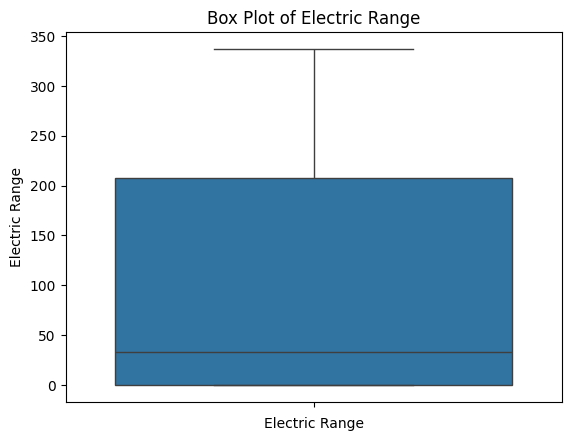

In [ ]:
sns.boxplot(data=data['Electric Range'])

plt.title('Box Plot of Electric Range')
plt.xlabel('Electric Range')

plt.show()

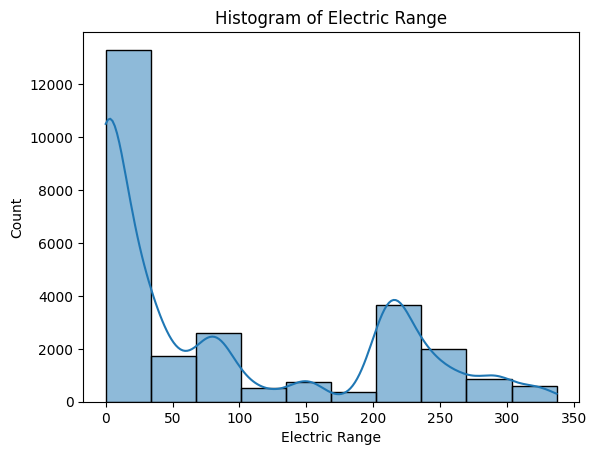

In [ ]:
sns.histplot(data=data['Electric Range'], kde=True, bins=10)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.show()

In [ ]:
stat, p_value = stats.shapiro(data['Electric Range'])
print(f'Statistic: {stat}, p-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print('Electric Range follows a normal distribution (Fail to reject H0)')
else:
    print('Electric Range does not follow a normal distribution (Reject H0)')

Statistic: 0.7975587667757953, p-value: 1.0262233381539034e-99
Electric Range does not follow a normal distribution (Reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26305.
  res = hypotest_fun_out(*samples, **kwds)


***Observations:***
*   The Mean Electric Range of all vehicles is 87.81.
*   The Max Electric Range by a vehicle is 337.00.
*   About 50% of vehicles have Electric range between 30.00 - 35.00
*   The data in Electric Range is not normally distributed.







***Analysis of Postal Code Feature***

In [ ]:
data['Postal Code'].describe()

,Postal Code
count,26305.000000
mean,98257.727922
std,302.103355
min,98001.000000
25%,98052.000000
50%,98119.000000
75%,98370.000000
max,99403.000000


In [ ]:
postal_counts = data['Postal Code'].value_counts()
postal_counts.head()

,count
Postal Code,
98052.0,714
98004.0,540
98033.0,511
98034.0,504
98501.0,446


In [ ]:
avg_vehicles_registered_per_postal_code = postal_counts.mean()
print(f'Average vehicles registered per postal code: {avg_vehicles_registered_per_postal_code}')

median_vehicles_registered_per_postal_code = postal_counts.median()
print(f'Median vehicles registered per postal code: {median_vehicles_registered_per_postal_code}')

Average vehicles registered per postal code: 58.97982062780269
Median vehicles registered per postal code: 20.0


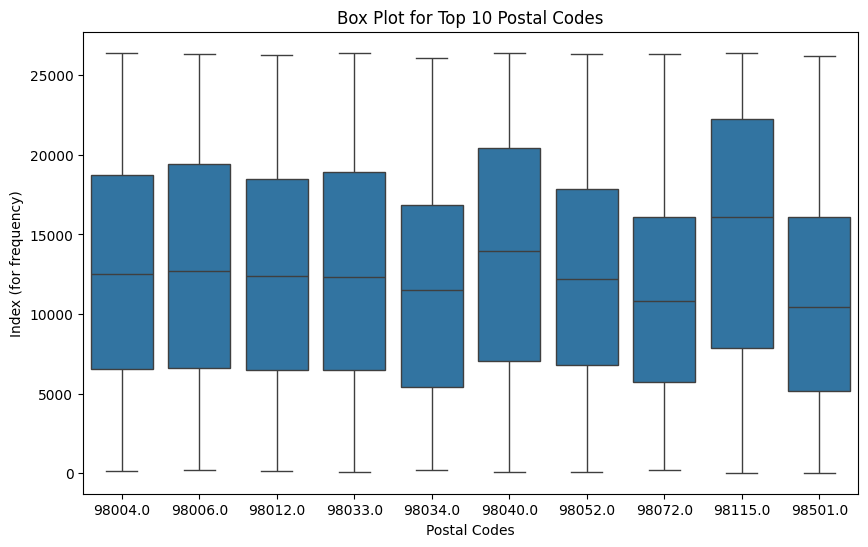

In [ ]:
top_10_postalcodes = data['Postal Code'].value_counts().head(10).index
df_top_10 = data[data['Postal Code'].isin(top_10_postalcodes)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Postal Code', y=df_top_10.index, data=df_top_10)
plt.title('Box Plot for Top 10 Postal Codes')
plt.xlabel('Postal Codes')
plt.ylabel('Index (for frequency)')
plt.show()

**Analysis of Clean Alternative Fuel Vehicle (CAFV) Eligibility**

In [ ]:
CAFV_Distribution = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

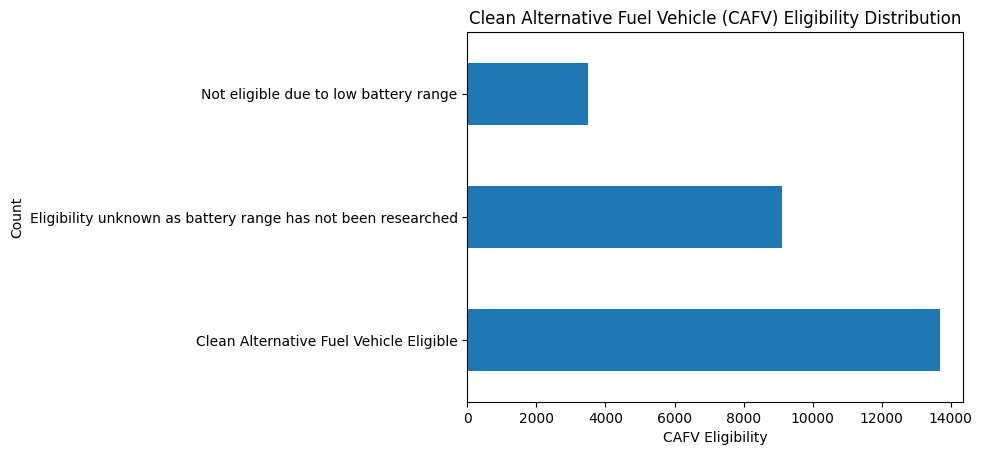

In [ ]:
CAFV_Distribution.plot(kind='barh')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility Distribution')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.show()

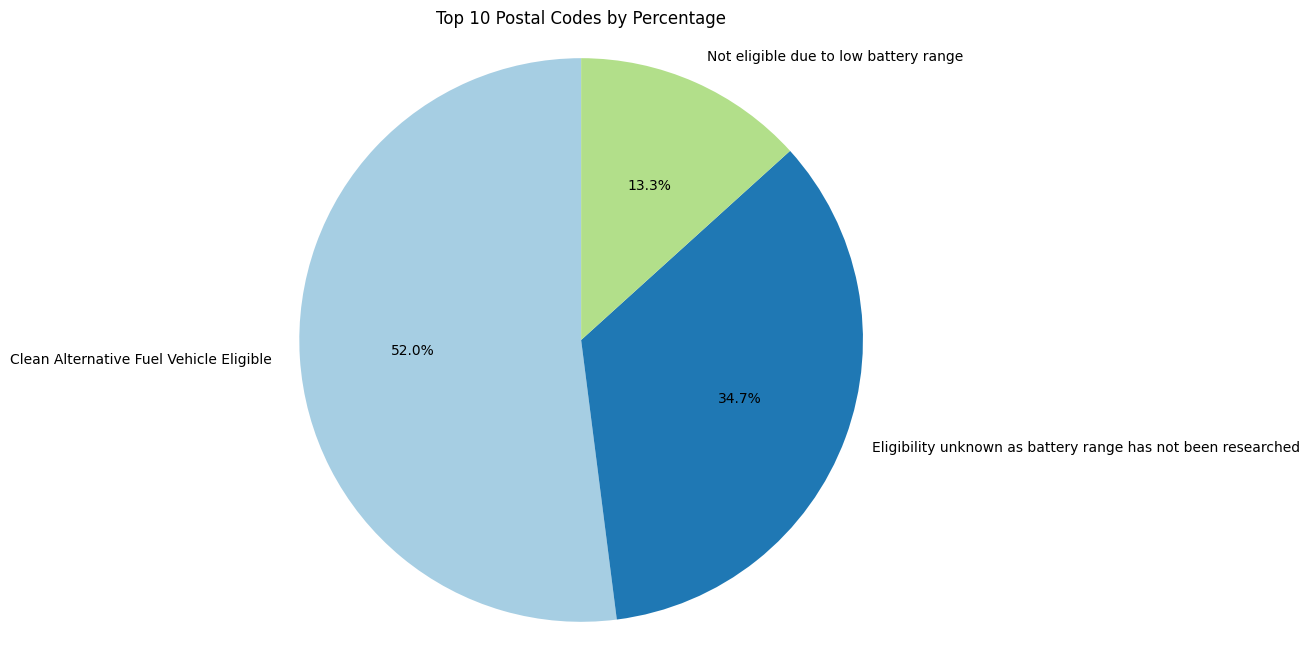

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(CAFV_Distribution, labels=CAFV_Distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Postal Codes by Percentage')
plt.axis('equal')
plt.show()

**Observations:**
*   Eligible Vehicles are 52.1%
*   Eligibility not known Vehicles are 34.8%
*   Not Eligible Vehicles are 13.1%





**Analysis of BaseMSRP Feature**

In [ ]:
data['Base MSRP'].describe()

,Base MSRP
count,26305.000000
mean,1762.530698
std,10586.733515
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,184400.000000


In [ ]:
BaseMSRP_Zero = (data['Base MSRP'] == 0).sum()
print(f'Number of vehicles with Base MSRP = 0: {BaseMSRP_Zero}')

Number of vehicles with Base MSRP = 0: 25511


**Observations:**
*   As majority of the values in the BaseMSRP column are "0". I suppose that this column is of no use for us and will also affect are overall analysis.
*   So, its better to drop this column from our dataset.



In [ ]:
data.drop('Base MSRP', axis=1, inplace=True)

In [ ]:
data.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201.0,2019.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,1.0,475635324.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,38.0,253546023.0,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,5.306104e+10
7,1N4AZ0CP0D,Snohomish,Mukilteo,WA,98275.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,21.0,176817364.0,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
8,1N4BZ0CP4G,Island,Clinton,WA,98236.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,10.0,475900379.0,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,40.0,100489049.0,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,5.305794e+10
10,WA1F2AFY1L,Thurston,Lacey,WA,98516.0,2020.0,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,22.0,103317238.0,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
11,5YJXCBE23L,Grant,Moses Lake,WA,98837.0,2020.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,13.0,3214494.0,POINT (-119.2771 47.13196),PUD NO 2 OF GRANT COUNTY,5.302501e+10


**Analysis of Electric Utility Feature**

In [ ]:
data['Make'].value_counts()

,count
Make,
TESLA,12018
NISSAN,3065
CHEVROLET,2446
FORD,1398
BMW,1092
KIA,1032
TOYOTA,1019
AUDI,591
VOLKSWAGEN,574


Observations:
*   Number of cars made/launched by each company.



**Grouping Companies and Year**

In [ ]:
models_by_year = data.groupby(['Make', 'Model Year']).size().unstack(fill_value=0)
cumulative_models_by_year = models_by_year.cumsum()
cumulative_models_by_year.head(50)

Model Year,2000.0,2008.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
Make,,,,,,,,,,,,,,,,
AUDI,0,0,0,0,0,0,0,0,46,55,50,96,45,136,160,3
AZURE DYNAMICS,0,0,0,1,0,0,0,0,46,55,50,96,45,136,160,3
BENTLEY,0,0,0,1,0,0,0,0,46,55,50,96,46,136,160,3
BMW,0,0,0,1,0,0,107,94,127,236,194,156,78,283,386,23
CADILLAC,0,0,0,1,0,0,115,94,130,239,201,156,78,283,386,23
CHEVROLET,0,0,0,17,120,179,276,208,194,925,457,395,343,375,600,63
CHRYSLER,0,0,0,17,120,179,276,208,194,948,587,420,389,459,645,63
FIAT,0,0,0,17,120,215,297,259,229,988,599,422,389,459,645,63
FISKER,0,0,0,17,128,215,297,259,229,988,599,422,389,459,645,63


In [ ]:
models_by_year.columns = models_by_year.columns.astype(str).str.strip()

In [ ]:
models_by_year.head()

Model Year,2000.0,2008.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
Make,,,,,,,,,,,,,,,,
AUDI,0,0,0,0,0,0,0,0,46,55,50,96,45,136,160,3
AZURE DYNAMICS,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
BENTLEY,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
BMW,0,0,0,0,0,0,107,94,81,181,144,60,32,147,226,20
CADILLAC,0,0,0,0,0,0,8,0,3,3,7,0,0,0,0,0


In [ ]:
country_car_count = data['County'].value_counts().head(10)
country_car_count.head()

,count
County,
King,13816
Snohomish,2918
Pierce,1933
Clark,1547
Thurston,1113


Top 10 Countries with highest number of cars introduced

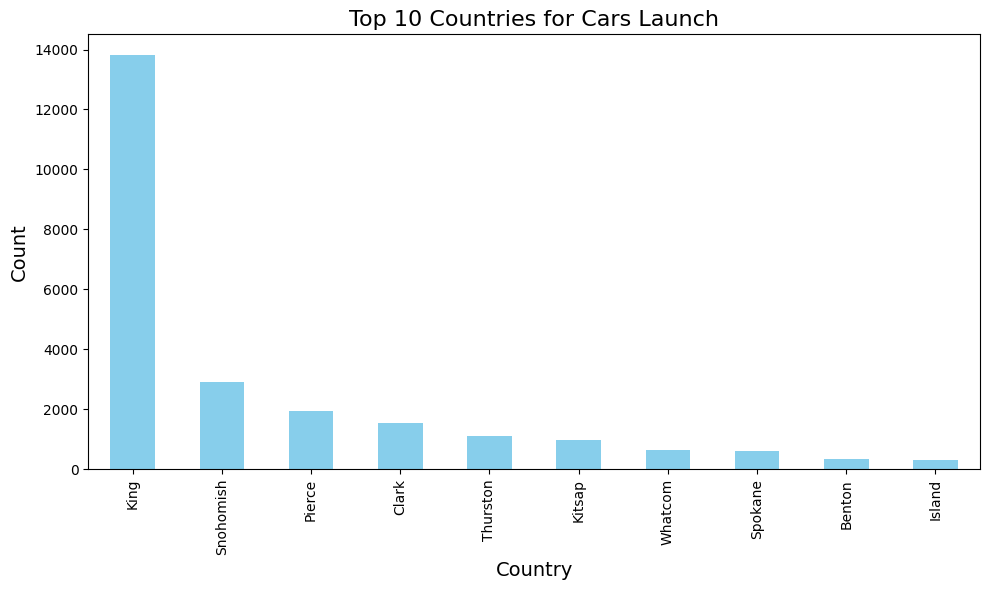

In [ ]:
plt.figure(figsize=(10, 6))
country_car_count.plot(kind='bar', color='skyblue')

plt.title('Top 10 Countries for Cars Launch', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Observations:
*   `King` has the highest number of cars introduced.



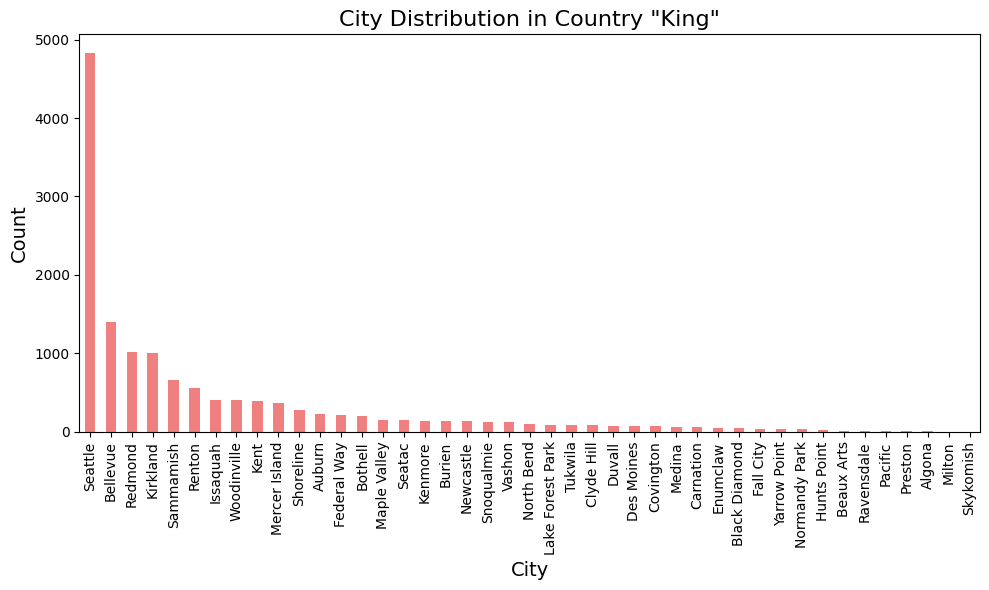

In [ ]:
king_city_distribution = data[data['County'] == 'King']

# Get the value counts for the 'City' column in the filtered data
city_distribution = king_city_distribution['City'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
city_distribution.plot(kind='bar', color='lightcoral')

plt.title('City Distribution in Country "King"', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

Choropleth using Plotly.express

In [ ]:
data_vehicle = data['County'].value_counts()
data_vehicle.head(10)

,count
County,
King,13816
Snohomish,2918
Pierce,1933
Clark,1547
Thurston,1113
Kitsap,983
Whatcom,635
Spokane,604
Benton,340


In [5]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.7 MB/s eta 0:00:00


In [14]:
data_grouped = data.groupby(['Model Year', 'Make']).size().reset_index(name='count')
data_pivot = data_grouped.pivot(index='Model Year', columns='Make', values='count')
data_pivot = data_pivot.fillna(0)

# **Race Plot Function**

In [20]:
import bar_chart_race as bcr

bcr.bar_chart_race(

    df=data_pivot,


    filename="final.mp4",


    orientation="h",


    sort="desc",


    n_bars=10,


    steps_per_period=45,


    period_length=3000,



    title='Year-wise Sales of Each Maker from the Last Decade',


    period_label={'x': .95, 'y': .15,
                  'ha': 'right',
                  'va': 'center',
                  'size': 72,
                  'weight': 'semibold'
                  },





    bar_kwargs={'alpha': .99, 'lw': 0},


    period_fmt='{x:.0f}',
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "
